# Latent Dirichlet Allocation ##


## Load the dataset

In [1]:
import firebase_admin
import gensim
from firebase_admin import credentials
from firebase_admin import firestore
databaseName='messages'

stopwords=['au', 'aux','bonjour', 'avec','ça', 'ce', 'ces', 'dans','merci','teach','teachr','oui', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne','néanmoins', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront', 'aurais', 'aurait', 'aurions', 'auriez', 'auraient', 'avais', 'avait', 'avions', 'aviez', 'avaient', 'eut', 'eûmes', 'eûtes', 'eurent', 'aie', 'aies', 'ait', 'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût', 'eussions', 'eussiez', 'eussent']


ModuleNotFoundError: No module named 'gensim'

In [ ]:
#  -------------------------- IMPORT FIREBASE COLLECTION


# Use a service account
cred = credentials.Certificate('service_file.json')
firebase_admin.initialize_app(cred)
db = firestore.client()
collection_ref = db.collection(databaseName)
docs = collection_ref.stream()

In [ ]:
# store all docs ids, except the test one
ids_array=[]
for doc in docs:
    if (doc.id !='D***************p'):
        ids_array.append(doc.id)


In [2]:
# store all messages in conversations
conversations_list=[]
for id in ids_array:
    collection_chat = db.collection(databaseName).document(id).collection('chat')
    docs=collection_chat.stream()
    document=[]
    for doc in docs:
        document.append(doc.to_dict()['text'])
    conversations_list.append(document)

NameError: name 'ids_array' is not defined

In [3]:
introMsg1="Bonjour ! \nje suis à ta disposition pour toute question ou information au sujet de l'appli Teach'r.\n N'hésite pas à me solliciter en cas de besoin, et je ferai le nécessaire pour t'aider\n En cas d'urgence ou si mon temps de réponse est anormalement long, tu peux nous contacter par mail à l'adresse support@teachr.fr\nAu plaisir de t'aider,\nL'équipe Teach'r"
introMsg2="Bonjour !\nje suis à votre disposition pour toute question ou information au sujet de l'appli Teach'r. \nN'hésitez pas à me solliciter en cas de besoin, et je ferai le nécessaire pour vous aider\nEn cas d'urgence ou si mon temps de réponse est anormalement long, veuillez nous contacter par mail à l'adresse support@teachr.fr\n Au plaisir de vous aider,\nL'équipe Teach'r"
introMsg3="Bonjour ! \nJe suis Benjamin du service client Teach'r. Si tu as une question ou que tu recherche une information, je suis là pour ça.\nTu peux retrouver toutes nos questions/réponses en cliquant sur ce lien : www.teachr.fr/faq \nN'hésite pas à me solliciter en cas de besoin, et je ferai le nécessaire pour t'aider\n En cas d'urgence ou si mon temps de réponse est anormalement long, tu peux nous contacter par mail à l'adresse support@teachr.fr\nAu plaisir de t'aider,\nL'équipe Teach'r"
introMsg4="Bonjour !\nJe suis Benjamin du service client Teach'r. Si vous avez une question ou que vous recherchez une information, je suis là pour ça.  \nVous pouvez retrouver toutes nos questions/réponses en cliquant sur ce lien : www.teachr.fr/faq \nN'hésitez pas à me solliciter en cas de besoin, et je ferai le nécessaire pour vous aider\nEn cas d'urgence ou si mon temps de réponse est anormalement long, veuillez nous contacter par mail à l'adresse support@teachr.fr\n Au plaisir de vous aider,\nL'équipe Teach'r"
introMsg5="Bonjour ! \nje suis Benjamin du service client Teach'r. Si tu as une question ou que tu recherche une information, je suis là pour ça.\nTu peux retrouver toutes nos questions/réponses en cliquant sur ce lien : www.teachr.fr/faq \nN'hésite pas à me solliciter en cas de besoin, et je ferai le nécessaire pour t'aider\n En cas d'urgence ou si mon temps de réponse est anormalement long, tu peux nous contacter par mail à l'adresse support@teachr.fr\nAu plaisir de t'aider,\nL'équipe Teach'r"
toExclude=[introMsg1,introMsg2,introMsg3,introMsg4,introMsg5]

filtered_list=[]
for conv in conversations_list:
    filtered_conv=[]
    for msg in conv:
        if msg not in toExclude:
            filtered_conv.append(msg)
    filtered_list.append(filtered_conv)

In [4]:
'''
Loading Gensim and nltk libraries
'''
# pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import *
import numpy as np


ModuleNotFoundError: No module named 'gensim'

### Lemmating / Stemming

In [5]:
import nltk
from nltk.stem.snowball import FrenchStemmer
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

lemmatizer=FrenchLefffLemmatizer()
stemmer = FrenchStemmer()

ModuleNotFoundError: No module named 'french_lefff_lemmatizer'

In [ ]:
def lem_stem(text):
    return lemmatizer.lemmatize(text,'n')

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in stopwords:
            result.append(lem_stem(token))      
    return result


In [ ]:
processed_list = []
for conv in filtered_list:
    for msg in conv:
        processed_list.append(preprocess(msg))


## Bag of words


In [ ]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
'''
dictionary = gensim.corpora.Dictionary(processed_list)


In [ ]:
'''
Remove very rare and very common words:

- words appearing less than 2 times
- words appearing in more than 70% of all documents
'''
dictionary.filter_extremes(no_below=2, no_above=0.7, keep_n= 100000)


In [ ]:
# '''
# Build a list with tokens and their frequency
# '''
# l=[(dictionary[id],dictionary.cfs[id]) for id in range(len(dictionary))]
# print(l)

### Bag of words ##

[`doc2bow(document)`](https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.doc2bow)

Convert the list into bag-of-words = list of (token_id, token_count)

In [ ]:
'''
Create the Bag-of-words model for each document: for each document we create a dictionary reporting how many
words and how many times those words appear.
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_list]


## Step 4: Running LDA using Bag of Words ##

https://radimrehurek.com/gensim/models/ldamulticore.html
number of topics is defined at the begining of the program

In [ ]:
'''
Train an lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
numberOfTopics = 3
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = numberOfTopics,id2word = dictionary, passes = 20, workers = 2)

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.023*"cour" + 0.017*"bien" + 0.016*"si" + 0.015*"ok" + 0.012*"heure" + 0.011*"tout" + 0.010*"bonsoir" + 0.010*"fait" + 0.009*"faire" + 0.009*"plus"


Topic: 1 
Words: 0.037*"cour" + 0.016*"bonne" + 0.013*"si" + 0.012*"demain" + 0.012*"envoyer" + 0.011*"accord" + 0.011*"faire" + 0.011*"disponible" + 0.010*"peux" + 0.010*"journée"


Topic: 2 
Words: 0.050*"réponse" + 0.049*"question" + 0.048*"si" + 0.047*"aider" + 0.047*"cas" + 0.045*"fr" + 0.028*"mail" + 0.025*"information" + 0.025*"adresse" + 0.025*"lien"




## Step 4: Visualization ##

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0


In [16]:
import pyLDAvis.gensim_models as gensimvis
#import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.382563 -0.003155       1        1  38.624331
1     -0.198024 -0.132691       2        1  32.071845
0     -0.184539  0.135846       3        1  29.303824, topic_info=         Term         Freq        Total Category  logprob  loglift
21   question  1306.000000  1306.000000  Default  30.0000  30.0000
4         cas  1256.000000  1256.000000  Default  29.0000  29.0000
11         fr  1201.000000  1201.000000  Default  28.0000  28.0000
24    réponse  1375.000000  1375.000000  Default  27.0000  27.0000
1       aider  1322.000000  1322.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
274      donc    96.395270   216.974478   Topic3  -5.3470   0.4161
57     pouvez   114.694423   608.314546   Topic3  -5.1732  -0.4410
3      besoin   120.489990   763.395046   Topic3  -5.1239  -0.6188
139   demande    77.977886   250.705605   Topic3  -5.5591   0.0596
29      temps    79.440763   737.227409   Topic3  -5.5405  -1.0004

[189 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
323       2  0.968456  accepter
52        2  0.998043    accord
52        3  0.003992    accord
0         1  0.998328   adresse
251       2  0.089046      aide
...     ...       ...       ...
253       3  0.988987      zoom
33        1  0.949178    équipe
33        2  0.050034    équipe
433       2  0.425074      être
433       3  0.571193      être

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

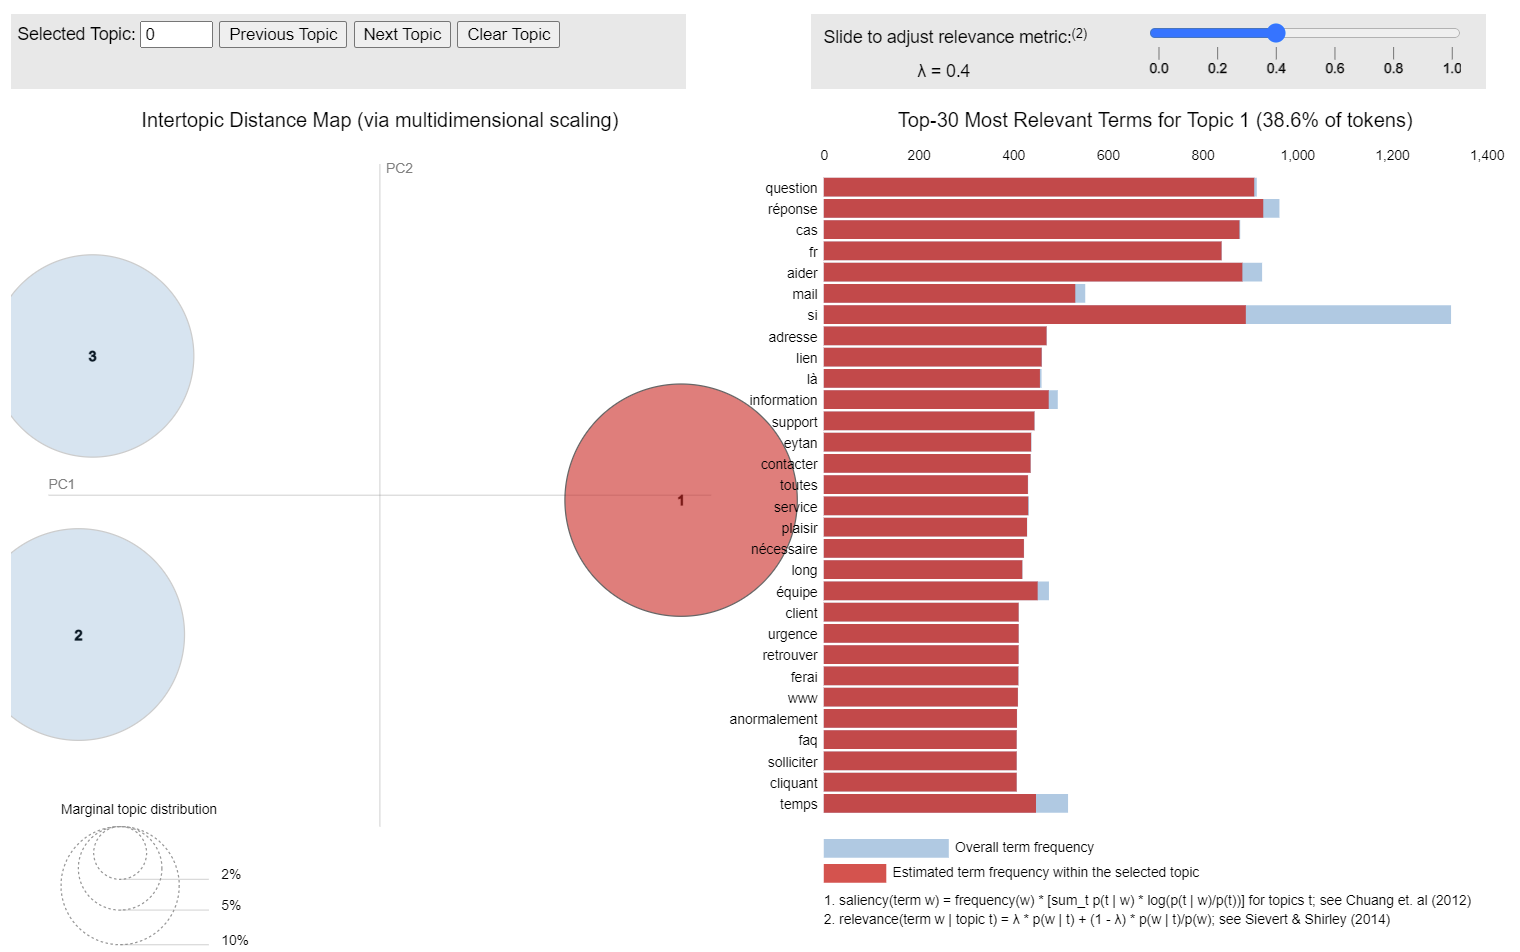